In [1]:
# Import necessary Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Load data from excel of US Power Plants Focus on Installed Capacity, Lat & Long
df = pd.read_excel(r'C:\Users\susta\Documents\MSU\ML_Data\PowerPlantsintheU_Export_TableToExcel.xlsx')
X = df[['Install_MW','Latitude', 'Longitude']]
X

,Install_MW,Latitude,Longitude
0,2.3,45.178600,-89.685000
1,1.3,45.113600,-87.758600
2,91.0,44.540000,-88.008600
3,3.8,45.233300,-88.067800
4,2.6,45.441100,-89.730600
...,...,...,...
12003,3.0,35.380139,-82.375953
12004,3.0,36.009321,-79.367698
12005,5.0,35.273434,-79.736312
12006,1.4,42.876570,-73.910480


In [3]:
# Split the data into training & testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
X_train, X_test

(       Install_MW   Latitude   Longitude
 11569         1.2  32.576159  -97.130048
 5426          6.4  43.820000  -75.917500
 11619         2.0  39.405457  -89.995709
 3896          7.5  42.961126 -123.359138
 8059          2.0  42.243250  -71.672328
 ...           ...        ...         ...
 11964         2.0  42.307119  -89.598098
 5191          3.0  35.690833 -100.240278
 5390          9.0  35.022700 -114.162700
 860           3.8  42.730717 -122.515122
 7270          3.1  33.926666  -88.997563
 
 [9606 rows x 3 columns],
       Install_MW   Latitude   Longitude
 6323         1.0  34.708333 -118.130556
 6232        79.9  43.913056  -75.698611
 8099         6.9  40.631872  -97.642708
 2119        12.0  45.081111 -121.886611
 9906         5.0  35.195870  -77.502759
 ...          ...        ...         ...
 1206        72.9  33.784500  -86.052400
 4414         2.9  34.889400  -81.072500
 4299         5.1  35.311900  -81.141400
 8683         1.5  40.710315  -74.004965
 1195         6.4

In [4]:
inertia = []
for k in range(1, 11):  # Adjust range as needed
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

C:\Users\susta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\susta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\susta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\susta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\susta\anaconda3\lib\site-packages\sklearn\clust

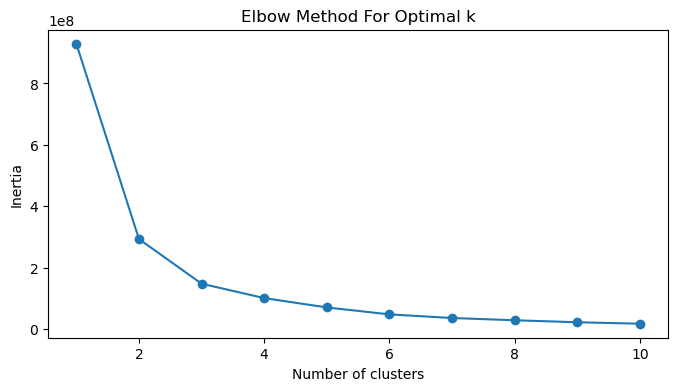

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
cluster_labels = kmeans.fit_predict(X_train)

C:\Users\susta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
df.loc[X_train.index, 'cluster'] = cluster_labels

In [8]:
# Determine optimal_k visually from the elbow plot
optimal_k = 3 # (insert your determined value here)

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_train)
df.loc[X_train.index, 'cluster'] = cluster_labels

C:\Users\susta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


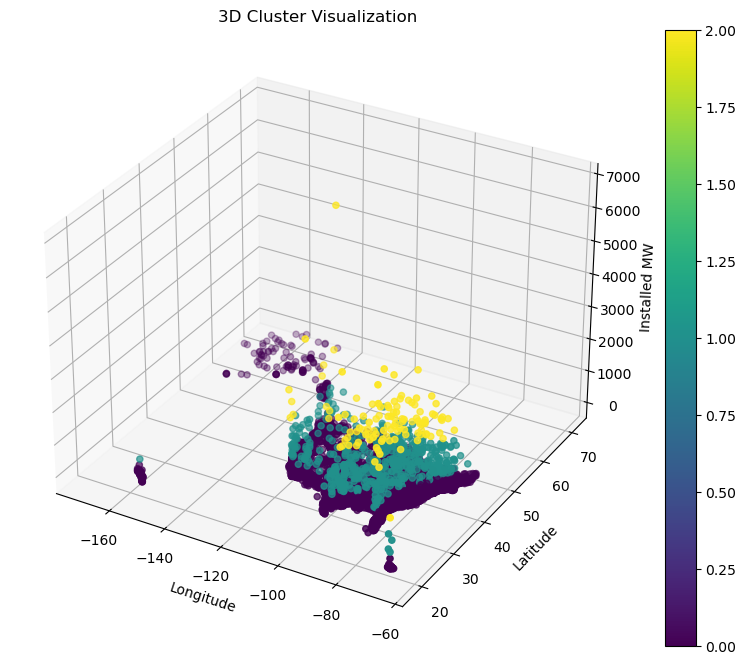

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Select only the training data for visualization
train_data = df.loc[X_train.index]

scatter = ax.scatter(train_data['Longitude'], train_data['Latitude'], train_data['Install_MW'], 
           c=train_data['cluster'], cmap='viridis', marker='o')

ax.set_title('3D Cluster Visualization')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Installed MW')
plt.colorbar(scatter)
plt.show()

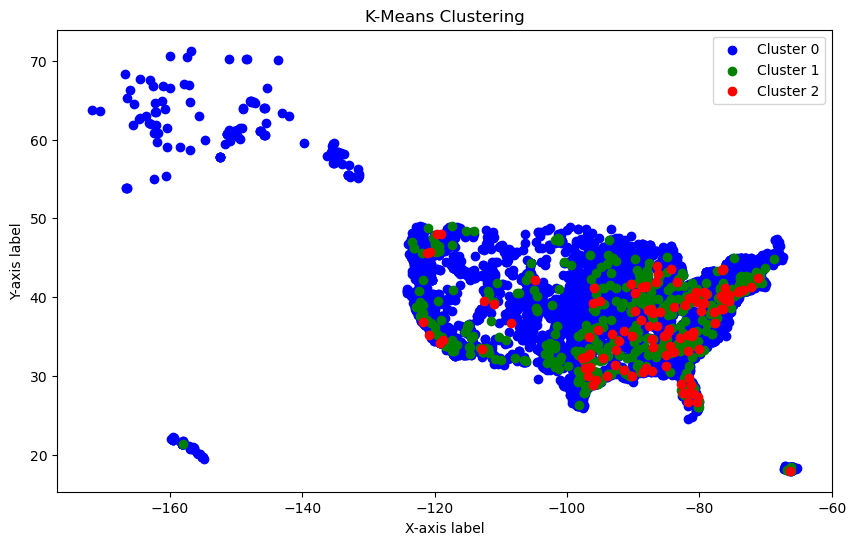

In [11]:
# Plotting
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']  # Add more colors if you have more than 8 clusters

for i in range(optimal_k):
    # Filter data for each cluster
    clustered_data = df[df['cluster'] == i]
    
    # Assuming 'x' and 'y' are the names of your columns
    plt.scatter(clustered_data['Longitude'], clustered_data['Latitude'], color=colors[i], label=f'Cluster {i}')

plt.title('K-Means Clustering')
plt.xlabel('X-axis label')  # Replace with your actual label
plt.ylabel('Y-axis label')  # Replace with your actual label
plt.legend()
plt.show()